# <center> Group Project Graph</center>
----


In [140]:
import pandas as pd
import numpy as np
import datetime
import re
from IPython.display import display, HTML 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [141]:
df=pd.read_csv('data/working/df.csv')

/Users/YuEnHsu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
dfct=pd.read_csv('data/working/dfct.csv')

------
# Complaint v.s. Neighborhood
## 1. Bar Chart: Trash Complaints by Neighbourhood

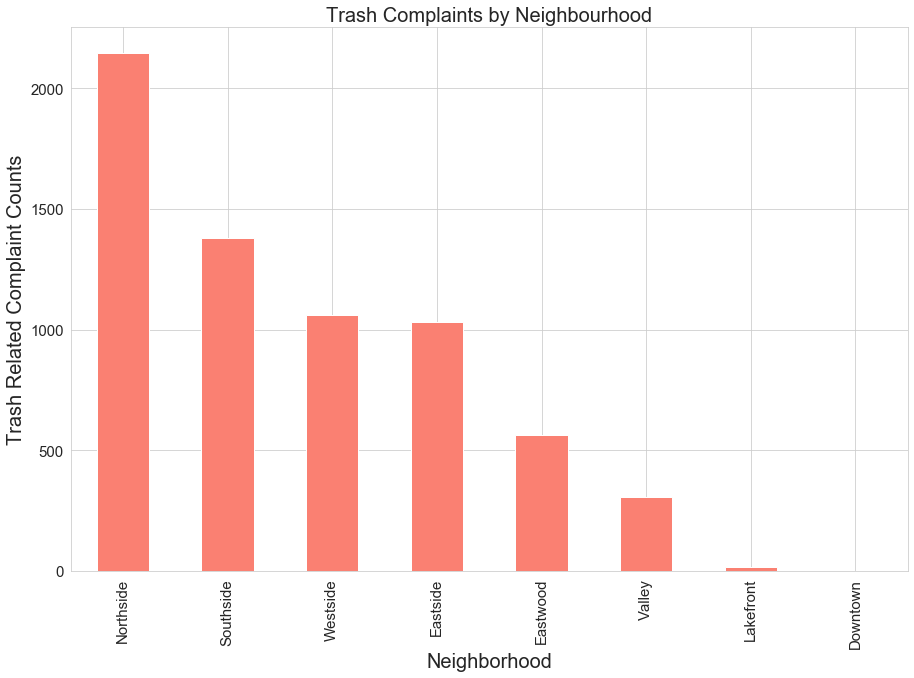

In [143]:
fig, axes = plt.subplots(figsize=(15,10))
YE1 = df['TNT_NAME'].value_counts().plot(kind = 'bar',
         title = 'Trash Complaints by Neighbourhood',
         color = 'salmon',
         figsize = (15,10))

axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood', fontsize=20)
axes.set_ylabel('Trash Related Complaint Counts',fontsize=20)
axes.set_title('Trash Complaints by Neighbourhood',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

YE1.figure.savefig('data/output/GP_Counts_Neighbourhood_Bar1.png')

In [144]:
df['TNT_NAME'].value_counts()

Northside    2145
Southside    1379
Westside     1061
Eastside     1030
Eastwood      563
Valley        306
Lakefront      15
Downtown        1
Name: TNT_NAME, dtype: int64

## 2. Stacked Bar Chart: Separated by Complaint Type

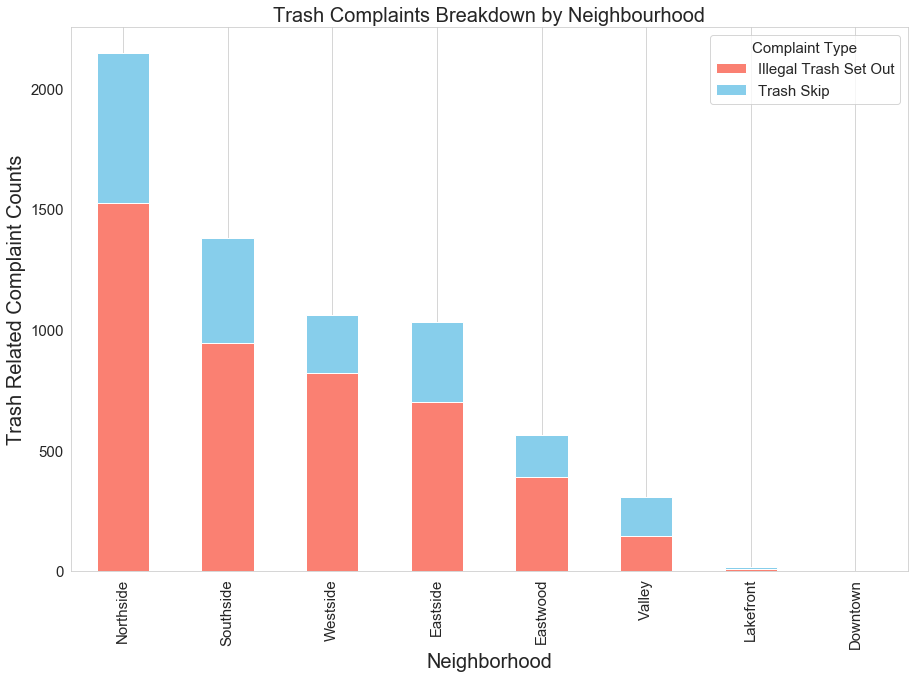

In [145]:



nhcomp = df.groupby(['TNT_NAME', 'complaint_type_name'])['TNT_NAME'].count().unstack('complaint_type_name').fillna(0)
nhcomp = nhcomp.sort_values('Illegal Trash Set Out', ascending=False)
nhcomp.plot(kind = 'bar', 
            stacked = True,  
            title = 'Breakdown of Complaint Types', 
            color=['salmon','skyblue'], figsize=(15,10)
           )

plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Trash Related Complaint Counts',fontsize=20)
plt.title('Trash Complaints Breakdown by Neighbourhood',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15)
plt.grid(axis='y')

plt.savefig('data/output/GP_Counts_Neighbourhood_Bar2.png')

In [146]:
nhcomp.head(8)

complaint_type_name,Illegal Trash Set Out,Trash Skip
TNT_NAME,,
Northside,1524.0,621.0
Southside,945.0,434.0
Westside,820.0,241.0
Eastside,701.0,329.0
Eastwood,389.0,174.0
Valley,146.0,160.0
Lakefront,8.0,7.0
Downtown,1.0,0.0


## 3. Grouped Bar Chart: Separated by Complaint Type

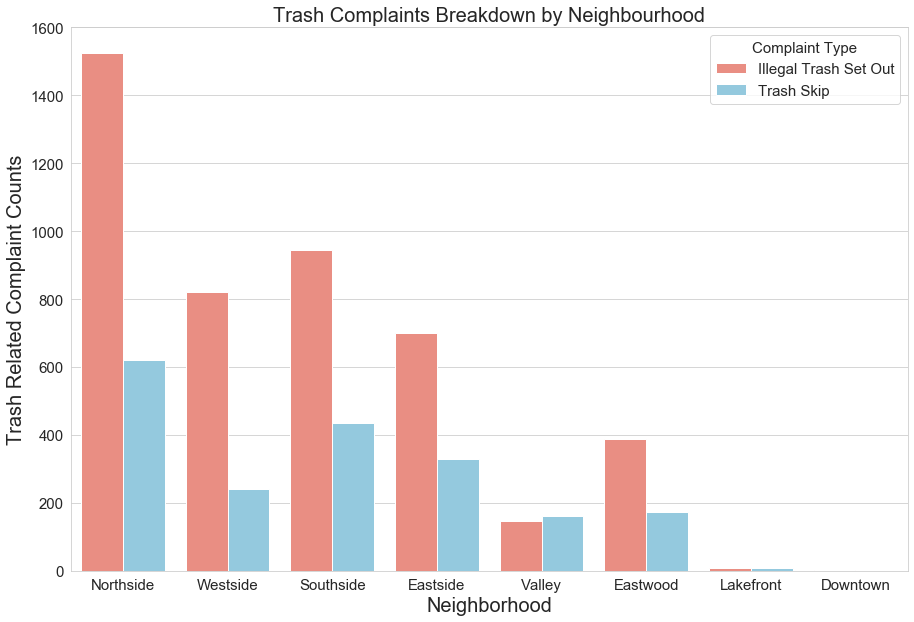

In [147]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
palette=['salmon','skyblue']
YE3=sns.countplot(x="TNT_NAME", hue="complaint_type_name", data=df, palette=palette)

plt.title('Trash Complaints Breakdown by Neighbourhood',fontsize = 20)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Trash Related Complaint Counts',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15, loc=1)
YE3.yaxis.grid(True)
plt.show()

YE3.figure.savefig('data/output/GP_Counts_Neighbourhood_Bar3.png')

-------
# Complaints by Income Level
## 1. Histogram: Income Distribution for Trash Related Complaints

In [148]:
df['mhinc1216'].describe()

count     6497.000000
mean     36679.779743
std      17114.079958
min       9911.631000
25%      26657.280000
50%      31994.470000
75%      42044.320000
max      92193.220000
Name: mhinc1216, dtype: float64

In [149]:
interval_range = pd.interval_range(start=9000, freq=5000, end=100000)
df['Median_Income_Range']=pd.cut(df['mhinc1216'],bins=interval_range)
df['Median_Income_Range'].value_counts()

(24000, 29000]    1632
(39000, 44000]     920
(29000, 34000]     823
(19000, 24000]     742
(34000, 39000]     502
(49000, 54000]     442
(14000, 19000]     388
(44000, 49000]     292
(69000, 74000]     190
(89000, 94000]     185
(79000, 84000]     130
(9000, 14000]       75
(64000, 69000]      72
(54000, 59000]      66
(74000, 79000]      38
(59000, 64000]       0
(84000, 89000]       0
(94000, 99000]       0
Name: Median_Income_Range, dtype: int64

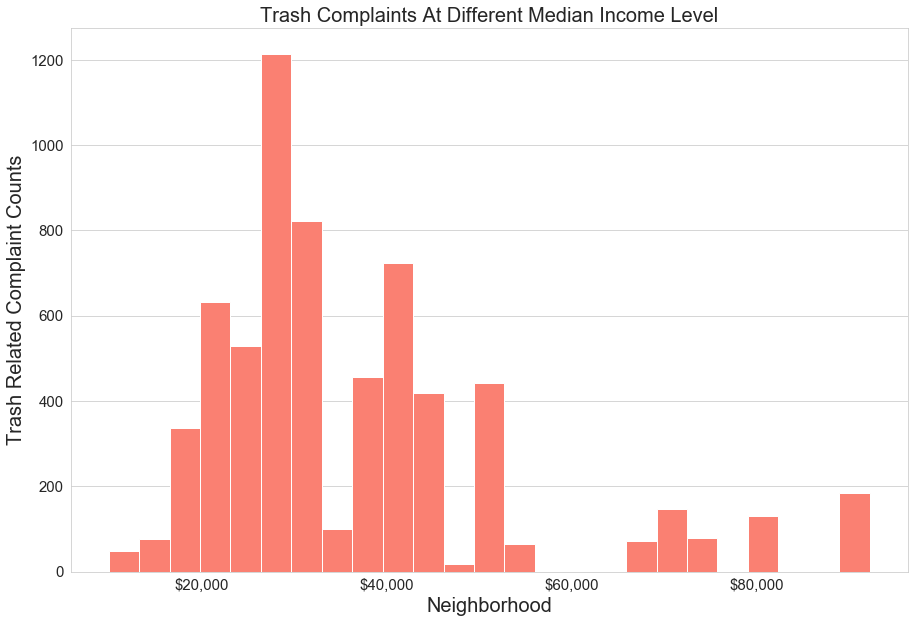

In [150]:
YE4 = df.hist(column='mhinc1216', bins = 25, figsize = (15,10), color='salmon')

plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Trash Related Complaint Counts',fontsize=20)
plt.title('Trash Complaints At Different Median Income Level',fontsize = 20)
plt.xticks([20000, 40000, 60000, 80000],['$20,000','$40,000','$60,000','$80,000'],fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.savefig('data/output/GP_Income_Hist1.png')
plt.show()


## 2. Stacked Bar Chart: Trash Related Complaints by Median Income Level and Complaint Type

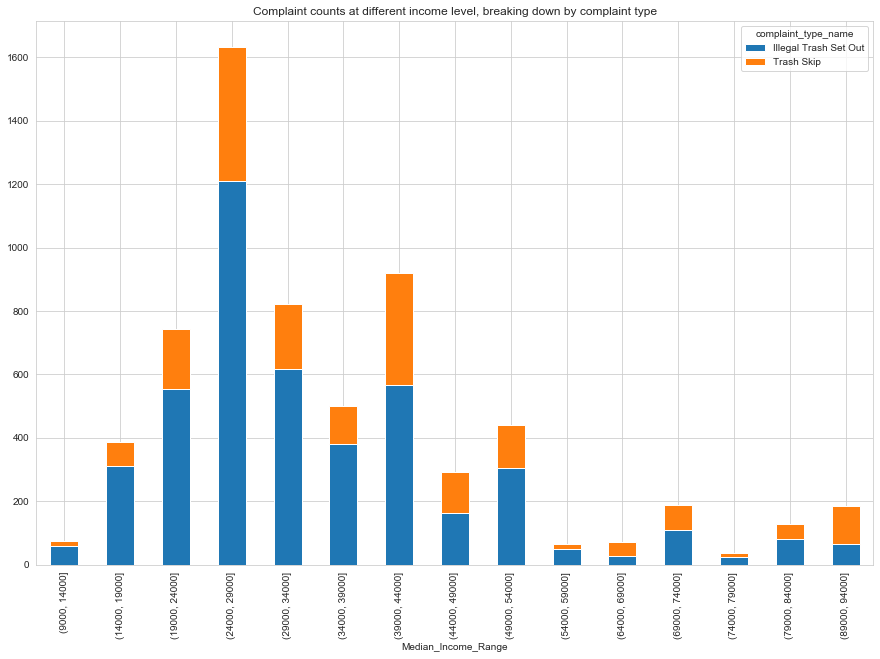

In [151]:
bg1 = df.groupby(['Median_Income_Range', 'complaint_type_name'])['Median_Income_Range'].count().unstack('complaint_type_name').fillna(0)
#bg1 = bg1.sort_values('Illegal Trash Set Out', ascending=False)
bg1.plot(kind = 'bar', 
            stacked = True,  
            title = 'Complaint counts at different income level, breaking down by complaint type', 
            figsize = (15,10)
           )

## 3. Scattered Chart: Trash Related Complaints by Median Income Level and Complaint Type

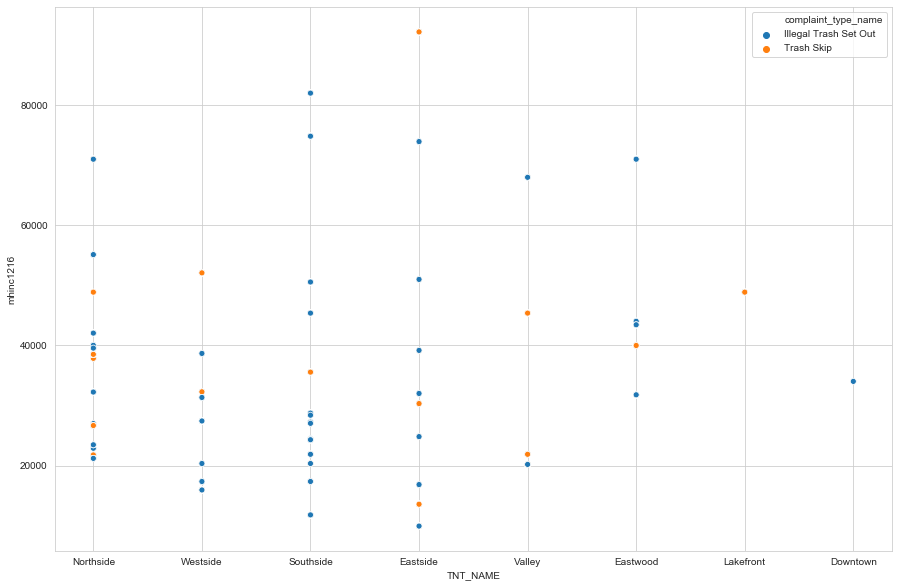

In [152]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="TNT_NAME", y="mhinc1216", hue='complaint_type_name',data=df)

## 4. Strip Chart: Trash Related Complaints by Median Income Level and Complaint Type

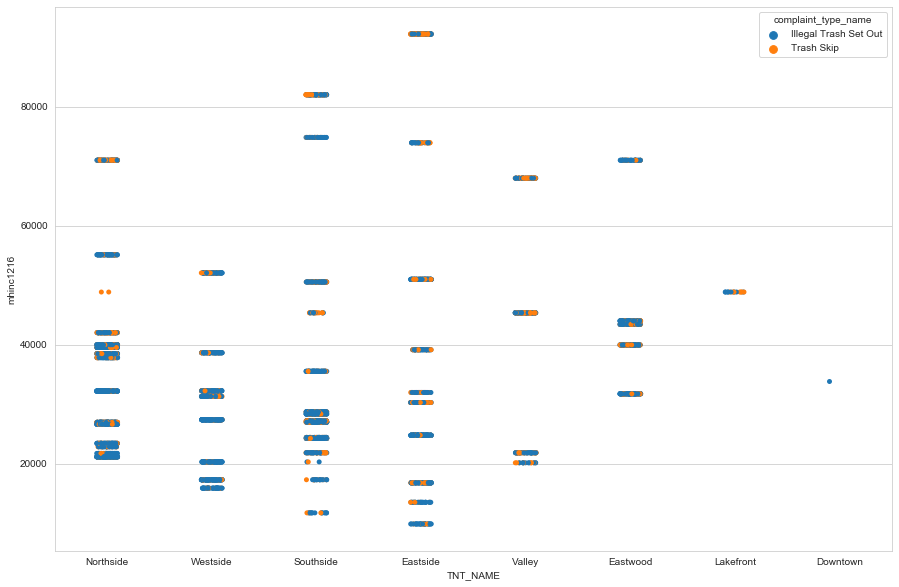

In [153]:
plt.figure(figsize=(15,10))
sns.stripplot(x="TNT_NAME", y="mhinc1216", hue='complaint_type_name',data=df)

## 5. Bar Chart: Complaints in Different Neighbourhood, breaking down by median income range

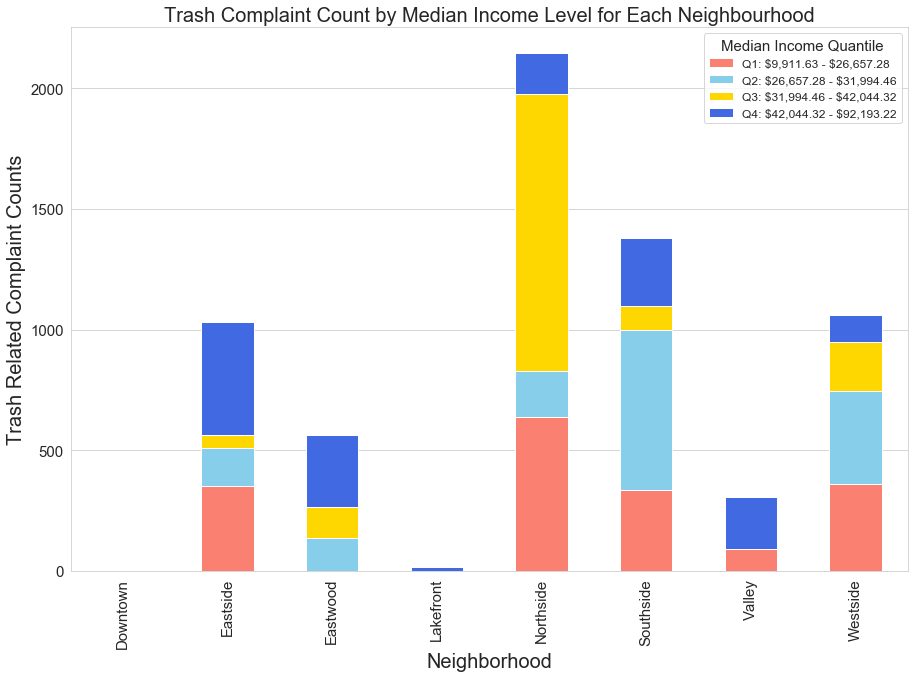

In [154]:
df['mhinc_qcut']=pd.qcut(df['mhinc1216'], 4)
bg2 = df.groupby(['TNT_NAME', 'mhinc_qcut'])['TNT_NAME'].count().unstack('mhinc_qcut').fillna(0)
#nhcomp = nhcomp.sort_values('Illegal Trash Set Out', ascending=False)
YE7 = bg2.plot(kind = 'bar', 
            stacked = True,  
            title = 'Breakdown of Complaint Types', 
            figsize = (15,10),
            color=['salmon','skyblue','gold','royalblue']
           )

plt.title('Trash Complaint Count by Median Income Level for Each Neighbourhood',fontsize = 20)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Trash Related Complaint Counts',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(labels=["Q1: \$9,911.63 - \$26,657.28",'Q2: \$26,657.28 - \$31,994.46', 'Q3: \$31,994.46 - \$42,044.32', 'Q4: \$42,044.32 - \$92,193.22'], 
           title='Median Income Quantile', fontsize=12, title_fontsize=15, loc='upper right')
YE7.yaxis.grid(True)
YE7.xaxis.grid(False)
plt.show()
YE7.figure.savefig('data/output/GP_Income_Bar1.png')

----------
## Correlation Between 2 Variables

## 1. Boxed Plot: Trash Related Complaints' Median Income Distribution

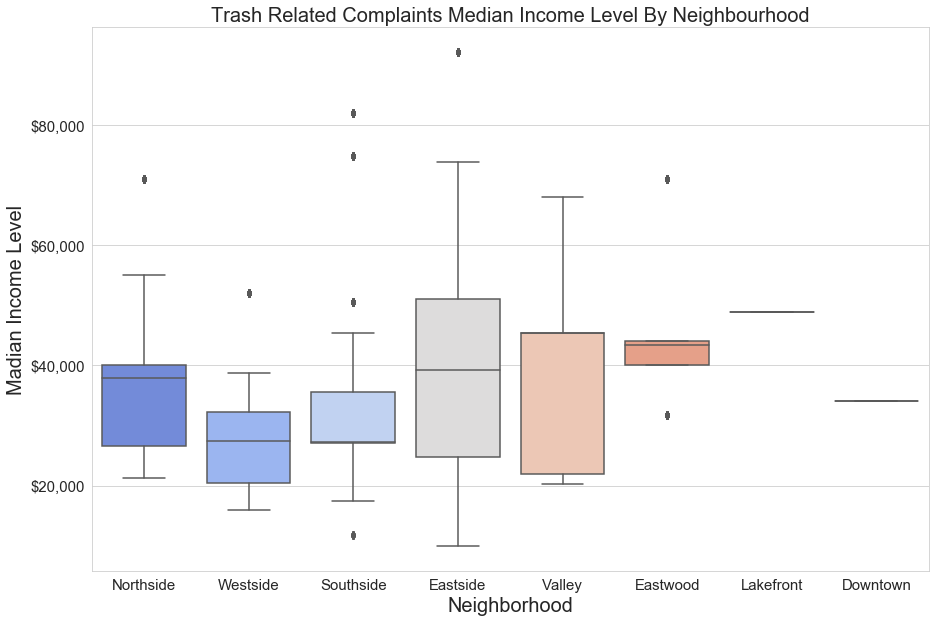

In [155]:
palette=sns.color_palette("coolwarm", 7)
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
YE5=sns.boxplot(x="TNT_NAME", y="mhinc1216", data=df,palette=palette)

plt.title('Trash Related Complaints Median Income Level By Neighbourhood',fontsize = 20)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Madian Income Level',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks([20000, 40000, 60000, 80000],['$20,000','$40,000','$60,000','$80,000'],fontsize=15)
YE5.yaxis.grid(True)
plt.show()

YE5.figure.savefig('data/output/GP_Income_Box1.png')

## 2. Violin Plot: Trash Related Complaints' Median Income Distribution, break down by complaint type

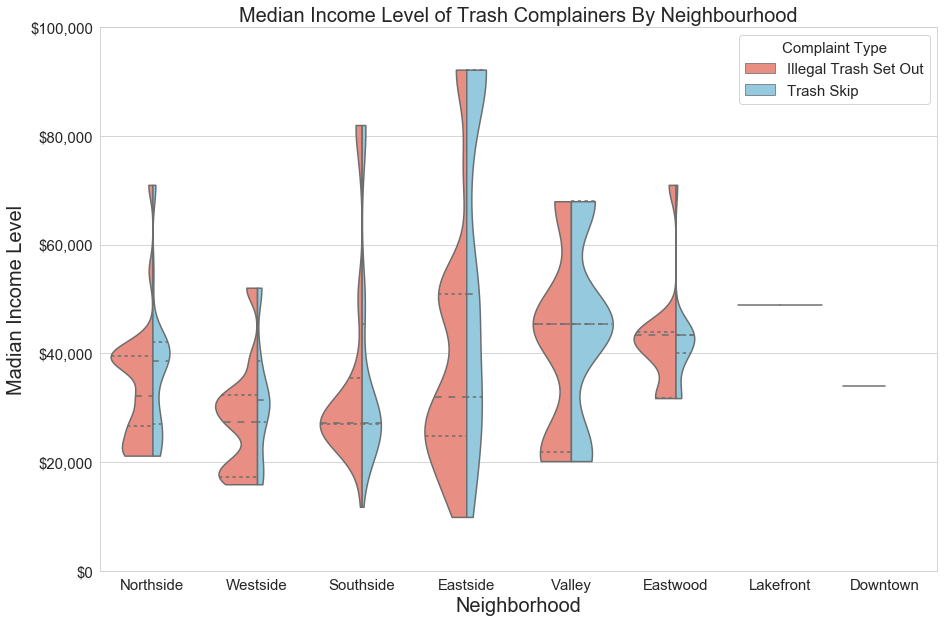

In [209]:
plt.figure(figsize=(15,10))
YE6=sns.violinplot(x='TNT_NAME', y="mhinc1216", hue="complaint_type_name",
               data=df, split=True,inner="quartile",palette=['salmon','skyblue'], scale='count', cut=0)


plt.title('Median Income Level of Trash Complainers By Neighbourhood',fontsize = 20)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Madian Income Level',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000],['$0','$20,000','$40,000','$60,000','$80,000','$100,000'],fontsize=15)
YE3.yaxis.grid(True)
plt.legend(title='Complaint Type', fontsize=15, title_fontsize=15, loc=1)
plt.show()
YE6.figure.savefig('data/output/GP_Income_Violin1.png')

---------
# Complaints by Education Level

In [157]:
data = pd.read_csv("data/original/final_merged_data.csv")

In [158]:
data_subset = data[['TNT_NAME','edlt1216','edhs1216','edba1216']]

In [159]:
bg1 = data.groupby(['TNT_NAME', 'edlt1216'])['TNT_NAME'].count().unstack('edlt1216').fillna(0)

In [160]:
nhcomp = data.groupby(['TNT_NAME', 'complaint_type_name'])['TNT_NAME'].count().unstack('complaint_type_name').fillna(0)

In [166]:
fip_df = data[["TNT_NAME","FIPS",'pedlt1216']].dropna().groupby(["TNT_NAME","FIPS",'pedlt1216']).sum().reset_index()

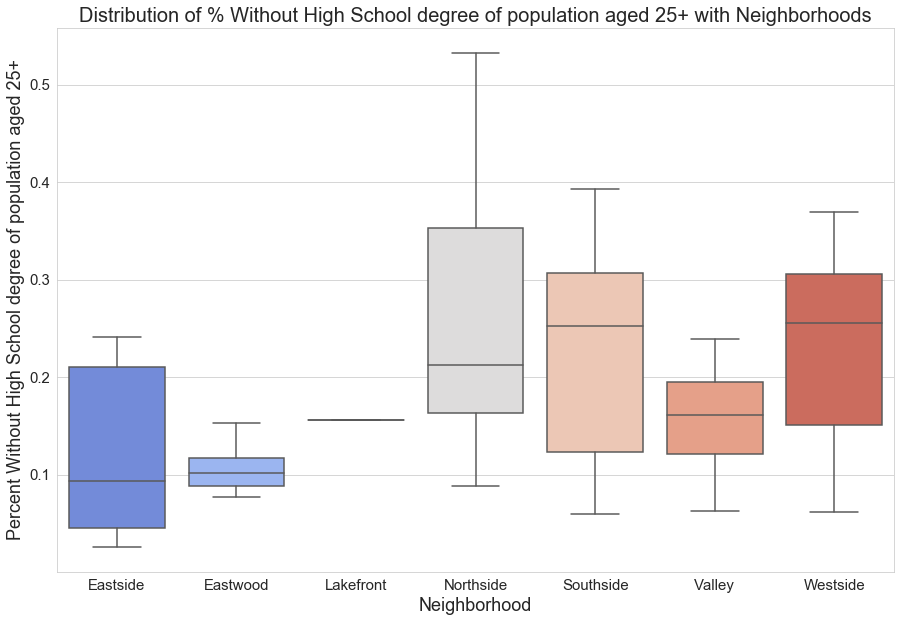

In [175]:
#fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
H1 = sns.boxplot("TNT_NAME","pedlt1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % Without High School degree of population aged 25+ with Neighborhoods", fontsize=20)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood', fontsize=18)
axes.set_ylabel('Percent Without High School degree of population aged 25+', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
H1.figure.savefig('data/output/GP_Edu_HS_Box1')

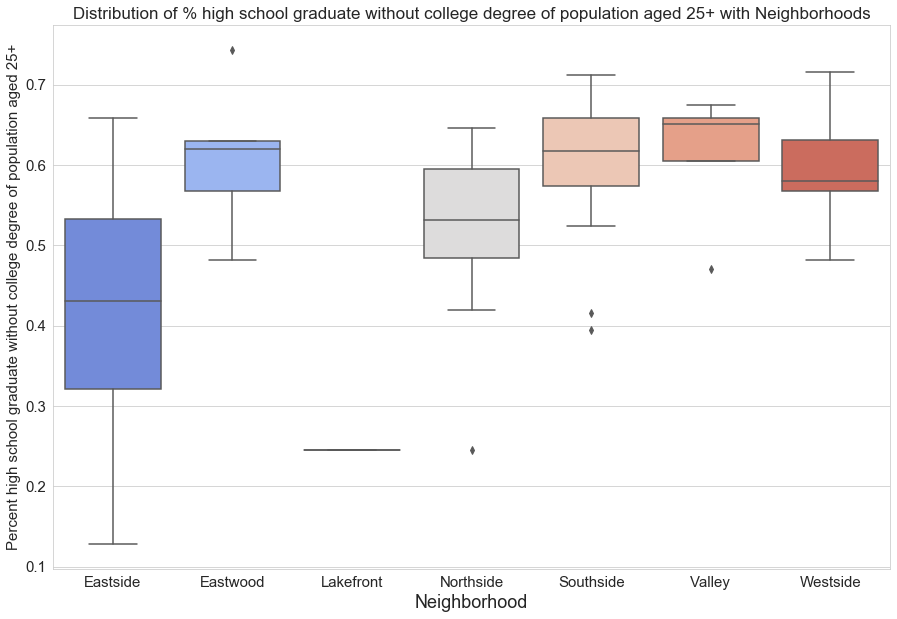

In [177]:
fip_df = data[["TNT_NAME","FIPS",'pedhs1216']].dropna().groupby(["TNT_NAME","FIPS",'pedhs1216']).sum().reset_index()
fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
H2 = sns.boxplot("TNT_NAME","pedhs1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % high school graduate without college degree of population aged 25+ with Neighborhoods", fontsize=17)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood', fontsize=18)
axes.set_ylabel('Percent high school graduate without college degree of population aged 25+', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
H2.figure.savefig('data/output/GP_Edu_Uni_Box1')

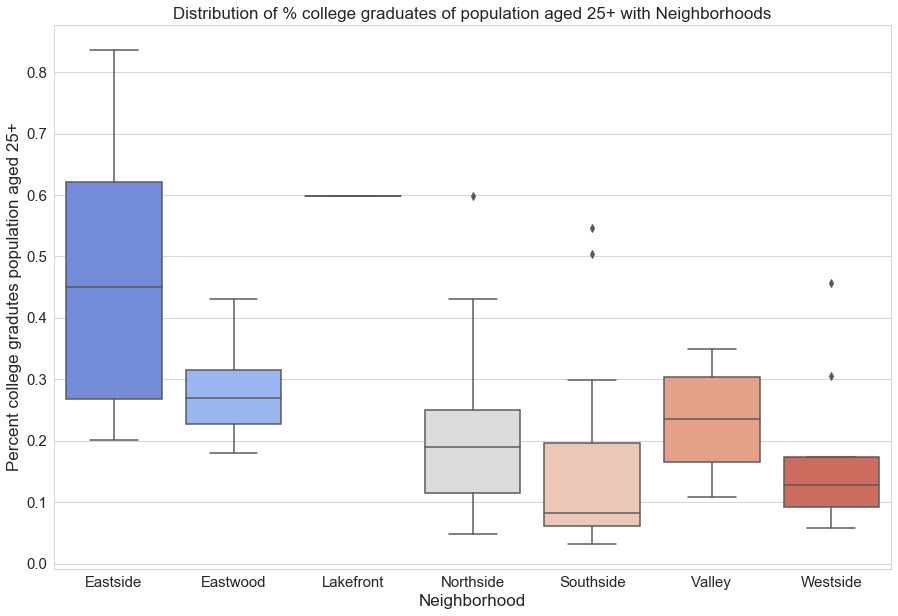

In [178]:
fip_df = data[["TNT_NAME","FIPS",'pedba1216']].dropna().groupby(["TNT_NAME","FIPS",'pedba1216']).sum().reset_index()
fip_df.reset_index(inplace=True)
fig, axes = plt.subplots(figsize=(15,10))
H3 = sns.boxplot("TNT_NAME","pedba1216", data=fip_df, ax = axes, palette=sns.color_palette("coolwarm", 7))
axes.set_title("Distribution of % college graduates of population aged 25+ with Neighborhoods", fontsize=17)
axes.yaxis.grid(True)
axes.set_xlabel('Neighborhood',fontsize=17)
axes.set_ylabel('Percent college gradutes population aged 25+',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
H3.figure.savefig('data/output/GP_Edu_BA_Box1')

In [179]:
fip_df_subset = data[["TNT_NAME",'pedlt1216','pedhs1216','pedba1216']].dropna()

In [180]:
fip_df_subset = fip_df_subset.groupby(["TNT_NAME"])['pedlt1216','pedhs1216','pedba1216'].agg([np.mean]).reset_index()

In [181]:
fip_df_subset.columns = ['TNT_NAME', 'pedlt1216', 'pedhs1216', 'pedba1216']

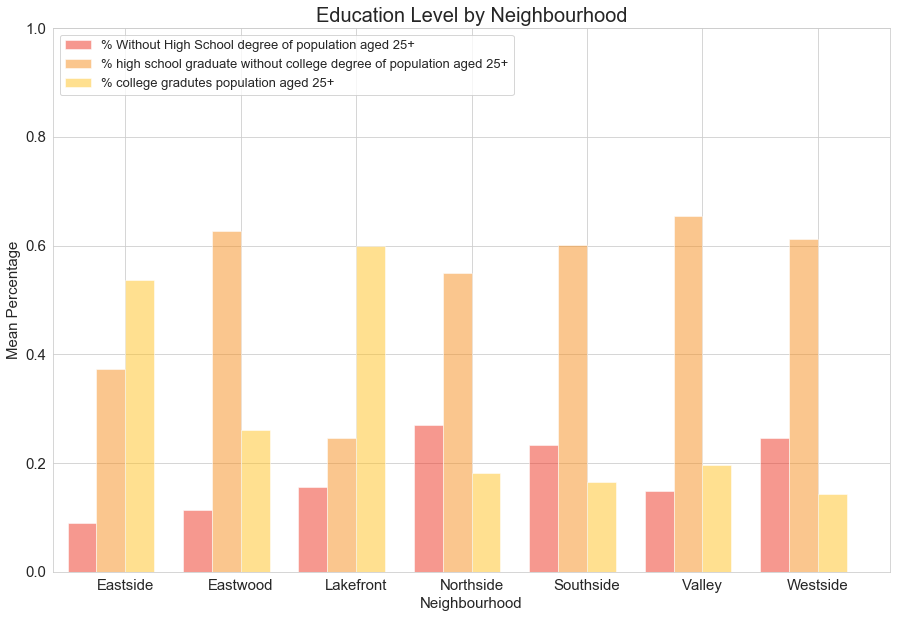

In [206]:
# Setting the positions and width for the bars
pos = list(range(len(fip_df_subset['pedlt1216']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with pre_score data,
# in position pos,
H4 = plt.bar(pos, 
        #using df['pre_score'] data,
        fip_df_subset['pedlt1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3220', 
        # with label the first value in first_name
        label=fip_df_subset['TNT_NAME'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
H4 = plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        fip_df_subset['pedhs1216'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=fip_df_subset['TNT_NAME'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
H4 = plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        fip_df_subset['pedba1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=fip_df_subset['TNT_NAME'][2]) 

# Set the y axis label
ax.set_ylabel('Mean Percentage', fontsize=15)
ax.set_xlabel('Neighbourhood', fontsize=15)
# Set the chart's title
ax.set_title('Education Level by Neighbourhood',fontsize=20)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(fip_df_subset['TNT_NAME'],fontsize=15)

plt.yticks(fontsize=15)


# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(fip_df_subset['pedlt1216'] + fip_df_subset['pedhs1216'] + fip_df_subset['pedba1216'])] )

# Adding the legend and showing the plot
plt.legend(['% Without High School degree of population aged 25+', 
            '% high school graduate without college degree of population aged 25+',
            '% college gradutes population aged 25+'], fontsize=13,loc='upper left')
plt.savefig('data/output/GP_Edu_Bar1.png')
plt.show()

In [107]:
fip_df_subset['TNT_NAME'][2]

'Lakefront'

In [108]:
data_trash_complaints = data[["complaint_type_name",'pedlt1216','pedhs1216','pedba1216']].dropna()
fip_df_subset = data_trash_complaints.groupby(["complaint_type_name"])['pedlt1216','pedhs1216','pedba1216'].agg([np.mean]).reset_index()
fip_df_subset.columns = ['complaint_type_name', 'pedlt1216', 'pedhs1216', 'pedba1216']


In [109]:
fip_df_subset

,complaint_type_name,pedlt1216,pedhs1216,pedba1216
0,Illegal Trash Set Out,0.219791,0.550719,0.229490
1,Trash Skip,0.190912,0.555958,0.253131


In [110]:
fip_df_subset['complaint_type_name'][1]

'Trash Skip'

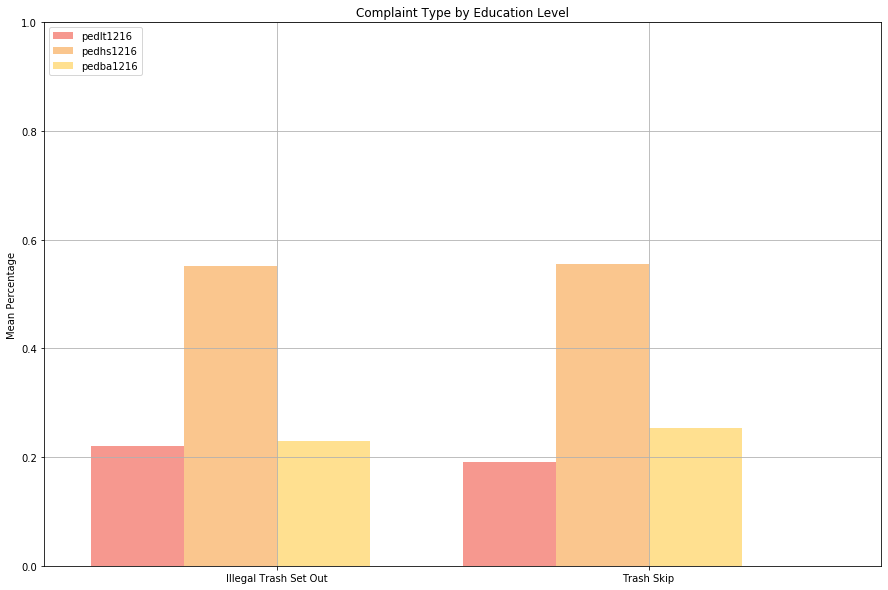

In [114]:
# Setting the positions and width for the bars
pos = list(range(len(fip_df_subset['pedlt1216']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fip_df_subset['pedlt1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3220', 
        # with label the first value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        fip_df_subset['pedhs1216'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        fip_df_subset['pedba1216'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=fip_df_subset['complaint_type_name'][0]) 

# Set the y axis label
ax.set_ylabel('Mean Percentage')

# Set the chart's title
ax.set_title('Complaint Type by Education Level')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(fip_df_subset['complaint_type_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(fip_df_subset['pedlt1216'] + fip_df_subset['pedhs1216'] + fip_df_subset['pedba1216'])] )

# Adding the legend and showing the plot
plt.legend(['pedlt1216', 'pedhs1216', 'pedba1216'], loc='upper left')
plt.grid()
plt.show()